# SPSA vs. Multipoint Gradient Estimation

In [9]:
# Imports
from GB_ZO.algorithms import *
from GB_ZO.utils import *
import moutain_car as rl

## 1. K-Means

In [10]:
# Training and plots 

## 2. Noisy Linear Regression 

In [11]:
# Training and plots

## 3. Architecture Optimization

In [12]:
# Training and plots

## 4. Reinforcement Learning (Mountain Car)

In [13]:
net = rl.MLPPolicy()
num_params = net.get_params().size
num_params

99

In [14]:
steps = 990

This means that Multipoint Gradient Estimator takes about 99x longer for one step!

In [ ]:
print("Training with SPSA...")
spsa_history, spsa_best_params = rl.train(spsa_gradient, steps=steps)

In [19]:
print("Training with Multipoint Gradient Estimator...")
multi_history, multi_best_params = rl.train(multipoint_gradient_estimator,steps=int(steps / num_params))  
# Note: 100 = 9900 / 100, so that we get a meaningful comparison in 
# terms of time and number of function calls for gradient estimations.

Training with Multipoint Gradient Estimator...


 10%|█         | 1/10 [00:13<01:59, 13.29s/it]

Step 0 - New best reward: -183.30


 50%|█████     | 5/10 [01:17<01:17, 15.57s/it]

Step 4 - New best reward: -179.48


100%|██████████| 10/10 [02:30<00:00, 15.10s/it]


In [21]:
# Compute the moving average of the rewards of the SPSA method
spsa_history_ma = compute_moving_avg(spsa_history, int(steps / num_params))
# Up-sample the rewards of the Multipoint Gradient Estimator method for better visualization
multi_history_up = np.repeat(multi_history, num_params)

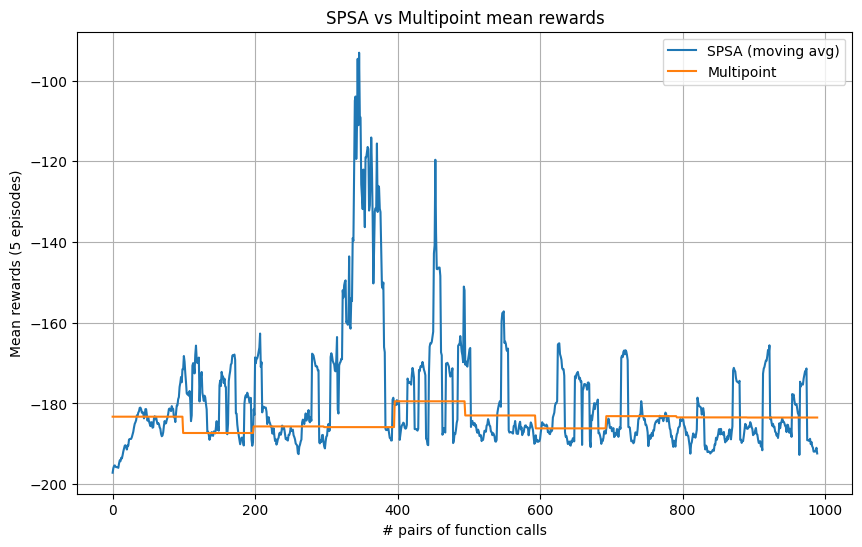

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(spsa_history_ma, label='SPSA (moving avg)')
plt.plot(multi_history_up, label='Multipoint')
plt.xlabel('# pairs of function calls')
plt.ylabel('Mean rewards (5 episodes)')
plt.title('SPSA vs Multipoint mean rewards')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Best SPSA policy visualization
rl.visualize_policy(spsa_best_params)

In [ ]:
# Best Multipoint Gradient Estimator policy visualization
rl.visualize_policy(multi_best_params)